In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['lines.markersize'] = 10

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (5,5)

In [2]:
data_folder = "../00_InputData"

In [3]:
names = pd.read_csv(data_folder+"/names.txt",sep=" ",header=None)
N1 = names[0][0]
N2 = names[1][0]

In [4]:
df = pd.read_csv(data_folder+"/3old+4old_IgGpos_MSraw.tsv",sep='\t')
df.head()

,Entry,Gene_Name,Intensity 0S+CIBN-0-R1,Intensity 0S+CIBN-0-R2,Intensity 0S+CIBN-0-R3,Intensity 0S+CIBN-5-R1,Intensity 0S+CIBN-5-R2,Intensity 0S+CIBN-5-R3,Intensity 0S+CIBN-20-R1,Intensity 0S+CIBN-20-R2,...,Intensity 0S-0-R3,Intensity 0S-5-R1,Intensity 0S-5-R2,Intensity 0S-5-R3,Intensity 0S-20-R1,Intensity 0S-20-R2,Intensity 0S-20-R3,Intensity 0S-20-PP2-R1,Intensity 0S-20-PP2-R2,Intensity 0S-20-PP2-R3
0,GFP-Caax;Cibn-GFP-Caax,NaN,19.550570,18.591810,18.565823,18.874302,17.561265,18.277727,19.403985,19.105758,...,24.616635,24.466586,24.290456,23.745230,24.519722,24.450191,24.275177,24.067814,24.190402,24.117229
1,E2QWG8,EIF3M,21.667993,19.436357,18.763547,22.744428,17.392025,19.380591,22.808294,22.211233,...,22.402162,22.889754,20.537252,20.624912,22.972169,20.814899,22.775361,20.643020,21.529433,19.752127
2,J9NVU0,ITGA6,21.490529,20.863494,19.584442,21.201848,21.156781,19.242437,21.964787,21.371903,...,23.081117,21.988788,21.484877,22.179439,21.428728,21.830485,22.392677,21.230948,21.778517,22.716742
3,J9P0L4,ARHGAP31,18.621659,17.548684,17.679174,18.220959,17.838297,17.950895,19.976665,18.751145,...,20.703270,18.392666,17.205636,17.038362,18.554796,17.738458,17.955546,16.647625,18.036291,19.909162
4,E2R4V5,TACC1,17.325525,19.813680,18.516859,17.309619,17.609633,17.694329,18.111317,19.547343,...,20.366633,18.692245,17.988265,17.777476,18.696466,19.153094,19.122949,19.942698,18.877345,20.801736


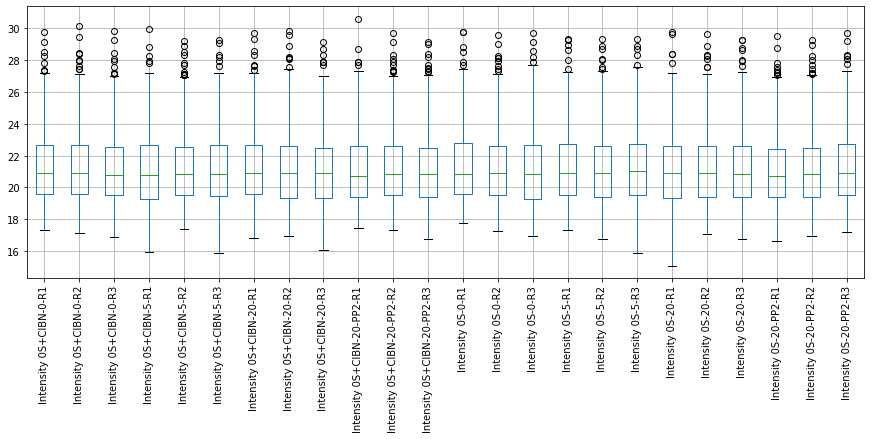

In [5]:
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (15,5)
f = plt.Figure()
df[df.columns[2:]].boxplot(rot=90)
f.set_tight_layout(True)
plt.close(f)

In [6]:
matplotlib.rcParams["figure.figsize"] = (5,5)

# Separating the two experiments

In [7]:
X_CIBN = df[df.columns[2:11]].T
c_CIBN_REP = np.concatenate([[sns.color_palette("Reds")[1+2*i] for i in range(3)] for _ in range(3)])
c_CIBN_TIME = np.concatenate([[sns.color_palette("Blues")[1+2*i] for _ in range(3)] for i in range(3)])

In [8]:
X_OS = df[df.columns[14:23]].T
c_OS_REP = np.concatenate([[sns.color_palette("Greys")[1+2*i] for i in range(3)] for _ in range(3)])
c_OS_TIME = np.concatenate([[sns.color_palette("Greens")[1+2*i] for _ in range(3)] for i in range(3)])

In [9]:
X_WHOLE = pd.concat([X_CIBN,X_OS])
c_WHOLE_REP = np.concatenate([c_CIBN_REP,c_OS_REP])
c_WHOLE_TIME = np.concatenate([c_CIBN_TIME,c_OS_TIME])

# Whole dataset PCA

In [10]:
pca = PCA()
pca.fit(X_WHOLE)
X_WHOLE_PCA = pca.transform(X_WHOLE)

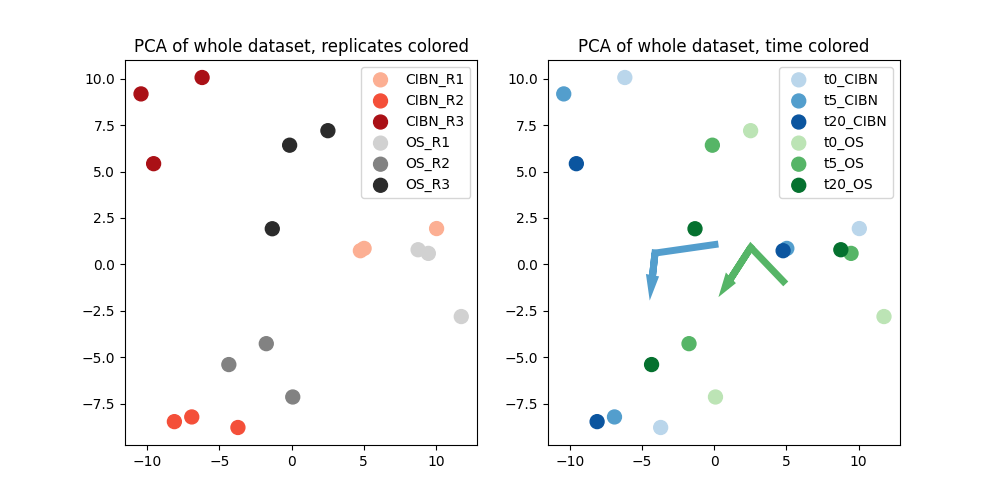

In [11]:
matplotlib.rcParams["figure.figsize"] = (10,5)
f = plt.figure()

ax1 = f.add_subplot(1,2,1)
ax2 = f.add_subplot(1,2,2)

ax1.set_title('PCA of whole dataset, replicates colored')
labels = [N1+"_R1",N1+"_R2",N1+"_R3",N2+"_R1",N2+"_R2",N2+"_R3"]
for i in range(2):
    for j in range(3):
        TMP = X_WHOLE_PCA[[9*i + 3*k + j for k in range(3)]]
        c_TMP = c_WHOLE_REP[[9*i + 3*k + j for k in range(3)]]
        ax1.scatter([x[0] for x in TMP], [x[1] for x in TMP], c=c_TMP,label=labels[3*i+j])
ax1.legend()

time_means = []
for i in range(6):
        time_means.append(np.mean(X_WHOLE_PCA[3*i:3*(i+1)],axis=0)[:2])
time_means

ax2.set_title('PCA of whole dataset, time colored')
labels = ["t0_"+N1,"t5_"+N1,"t20_"+N1,"t0_"+N2,"t5_"+N2,"t20_"+N2]
for i in range(6):
    ax2.scatter([x[0] for x in X_WHOLE_PCA[3*i:3*(i+1)]], [x[1] for x in X_WHOLE_PCA[3*i:3*(i+1)]], c=c_WHOLE_TIME[3*i:3*(i+1)], label=labels[i])
ax2.plot([t[0] for t in time_means[:3]],[t[1] for t in time_means[:3]], lw = 5, c = sns.color_palette("Blues")[3])
ax2.plot([t[0] for t in time_means[3:]],[t[1] for t in time_means[3:]], lw = 5, c = sns.color_palette("Greens")[3])
ax2.arrow(time_means[1][0],time_means[1][1],time_means[2][0] - time_means[1][0],time_means[2][1] - time_means[1][1], lw = 5,head_width=0.3,color = sns.color_palette("Blues")[3])
ax2.arrow(time_means[4][0],time_means[4][1],time_means[5][0] - time_means[4][0],time_means[5][1] - time_means[4][1], lw = 5,head_width=0.3,color = sns.color_palette("Greens")[3])
ax2.legend()
plt.show()

# Looking at the explained variance of the PCs

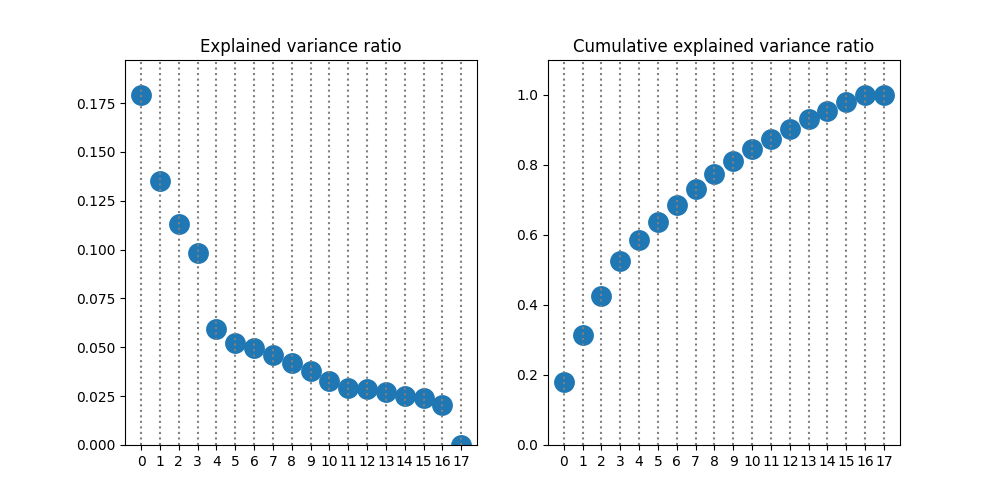

In [12]:
matplotlib.rcParams['lines.markersize'] = 10

f = plt.figure()
ax1 = f.add_subplot(1,2,1)
ax2 = f.add_subplot(1,2,2)
ax1.set_title("Explained variance ratio")
ax2.set_title("Cumulative explained variance ratio")
for i in range(18):
    ax1.plot([i,i],[0,1],":",c="grey")
ax1.scatter([str(i) for i in range(18)],pca.explained_variance_ratio_,lw=5)
ax1.set_ylim(0,pca.explained_variance_ratio_[0]*1.1)

for i in range(18):
    ax2.plot([i,i],[0,1.1],":",c="grey")
ax2.scatter([str(i) for i in range(18)],np.cumsum(pca.explained_variance_ratio_),lw=5)
ax2.set_ylim(0,1.1)
plt.show()

# Viewing specific protein

# Looking at proteins with highest loadings in the PCs

In [13]:
def show_prot_one_condition(ax,i,df,c):
    tmp = df.iloc[i]
    diff = [-0.1,0,0.1]
    for time in range(3):
        x = [time+diff[batch] for batch in range(3)]
        y = [tmp[3*time + batch] for batch in range(3)]
        ax.scatter(x,y,c = c)

def show_prot(i,X_CIBN=X_CIBN,X_OS=X_OS):
    matplotlib.rcParams["figure.figsize"] = (10,5)
    f = plt.figure()
    f.suptitle(df["Gene_Name"][i])
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122,sharey=ax1)
    ax1.set_title(N1)
    ax2.set_title(N2)
    show_prot_one_condition(ax1,i,X_CIBN.T,c_CIBN_REP[:3])
    show_prot_one_condition(ax2,i,X_OS.T,c_OS_REP[:3])
    ax1.set_xticks([0,1,2])
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Intensity")
    ax2.set_xticks([0,1,2])
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Intensity")
    
def show_prot_name(name,X_CIBN=X_CIBN,X_OS=X_OS):
    matplotlib.rcParams["figure.figsize"] = (10,5)
    f = plt.figure()
    i = 0
    for j in range(len(df["Gene_Name"])):
        if df["Gene_Name"][j] == name:
            i = j
    f.suptitle(df["Gene_Name"][i])
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122,sharey=ax1)
    ax1.set_title(N1)
    ax2.set_title(N2)
    show_prot_one_condition(ax1,i,X_CIBN.T,c_CIBN_REP[:3])
    show_prot_one_condition(ax2,i,X_OS.T,c_OS_REP[:3])
    ax1.set_xticks([0,1,2])
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Intensity")
    ax2.set_xticks([0,1,2])
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Intensity")

def show_prot_1(i,X=X_CIBN,c=c_CIBN_REP[:3],gene_names=df["Gene_Name"]):
    matplotlib.rcParams["figure.figsize"] = (5,5)
    f = plt.figure()
    f.suptitle(gene_names[i])
    ax1 = plt.subplot(111)
    show_prot_one_condition(ax1,i,X.T,c)
    ax1.set_xticks([0,1,2])
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Intensity")

In [14]:
loadings_w_index = list(zip(range(len(pca.components_[0])),np.sqrt(pca.components_[0]**2+pca.components_[1]**2)))
loadings_w_index_sorted = sorted(loadings_w_index, key = lambda x : x[1],reverse=True)

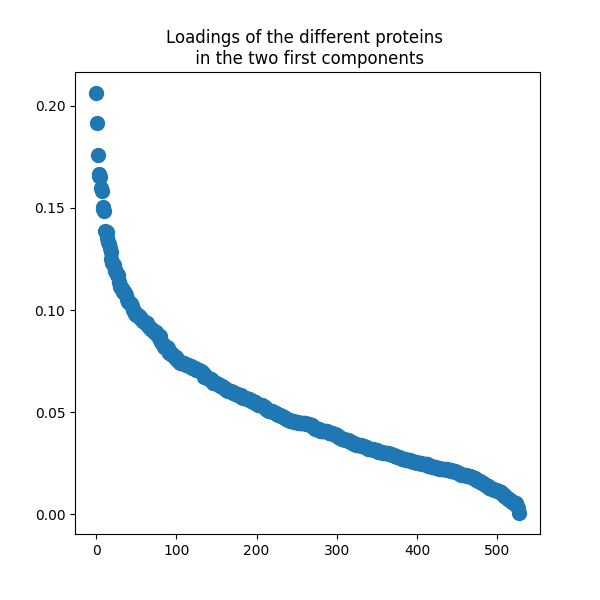

In [15]:
matplotlib.rcParams["figure.figsize"] = (6,6)
f = plt.figure()
plt.title("Loadings of the different proteins \n in the two first components")
plt.scatter(range(len(loadings_w_index_sorted)),[x[1] for x in loadings_w_index_sorted])

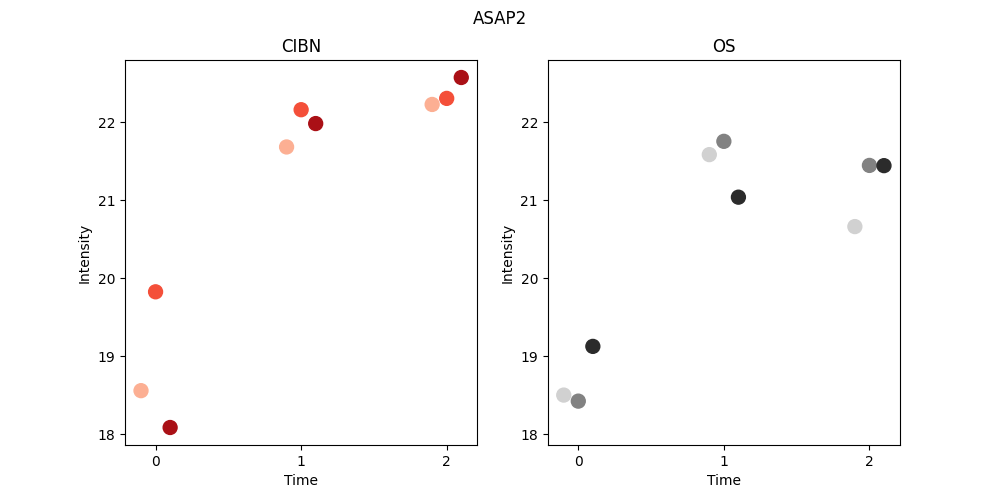

In [16]:
show_prot_name("ASAP2")

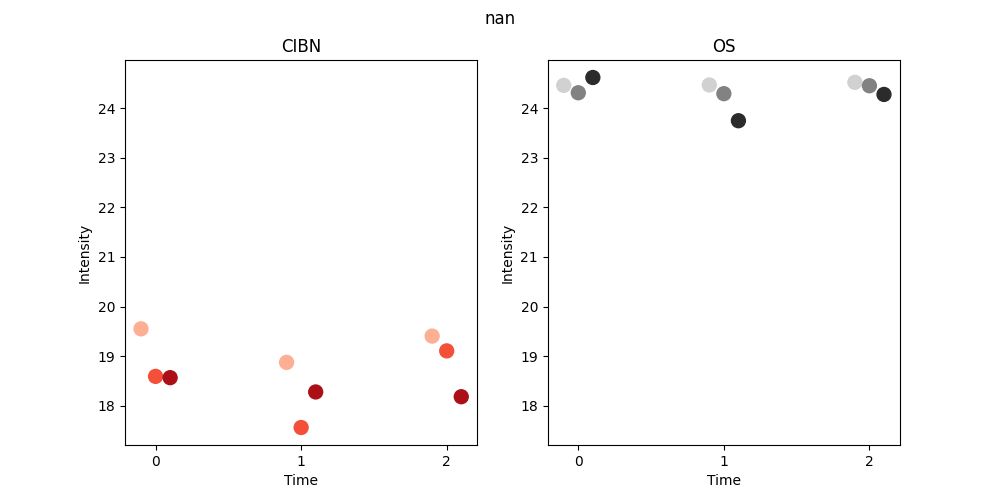

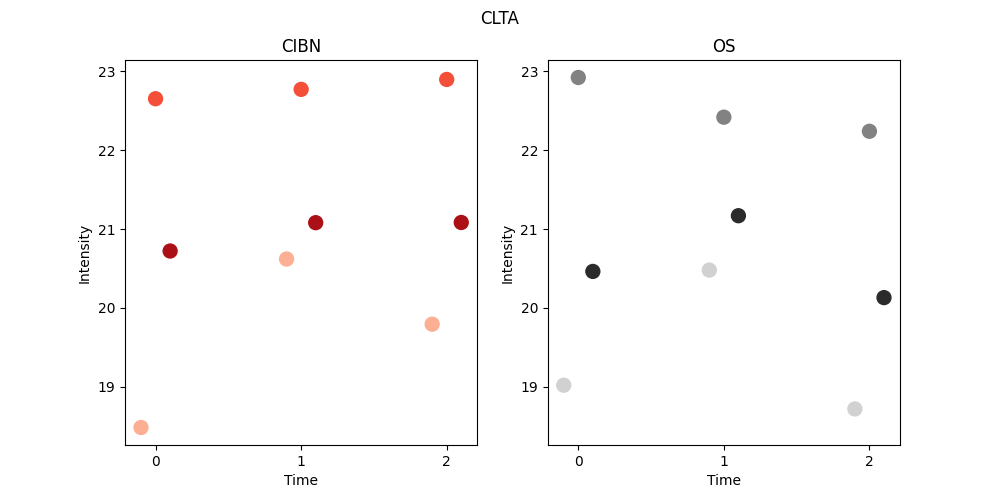

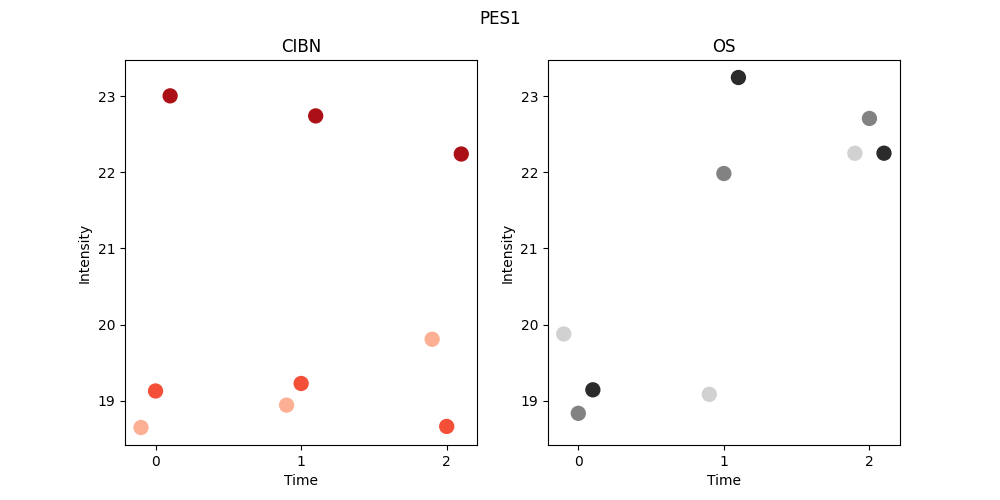

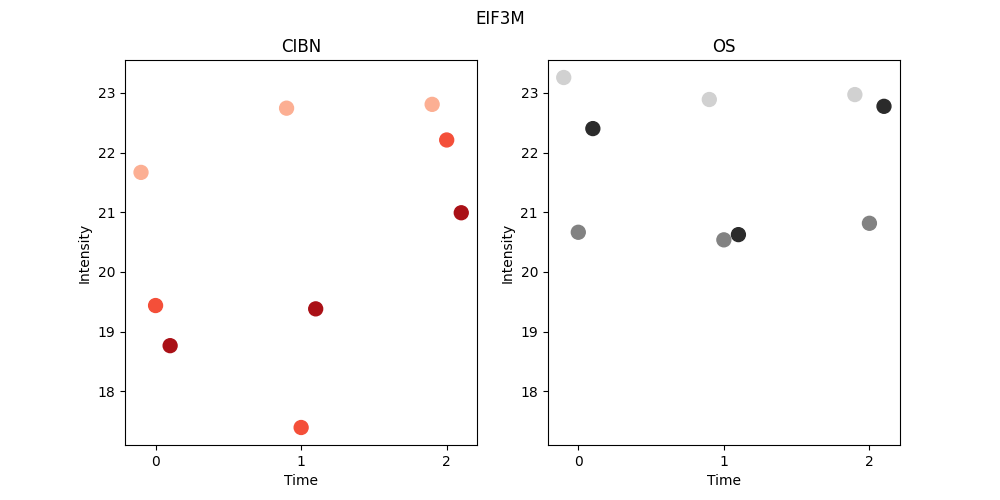

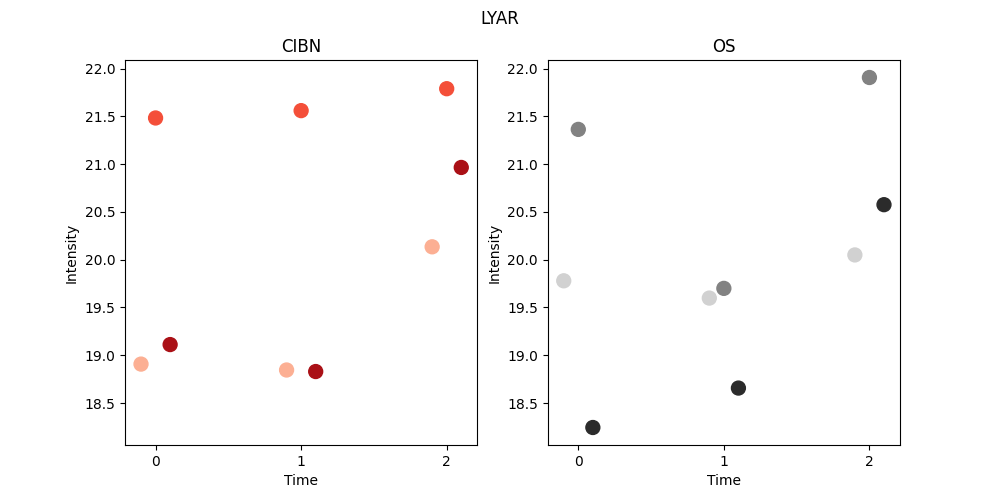

In [17]:
for el,val in loadings_w_index_sorted[:5]:
    show_prot(el)

# BATCH CORRECTION USING 2 first PCA components

In [18]:
rep_means = []
for i in range(2):
    for j in range(3):
        TMP = X_WHOLE_PCA[[9*i + 3*k + j for k in range(3)]]
        rep_means.append(np.mean(TMP,axis=0)[:2])


In [19]:
X_WHOLE_CORRECTED = [ 0 for _ in range(18)]

for j in range(3):
    X_WHOLE_CORRECTED[3*j] = X_WHOLE.iloc[3*j]
    
for i in range(2):
    for j in range(3):
        if i + j != 0:
            #delta = rep_means[0] - rep_means[3*i + j]
            delta = - rep_means[3*i + j]
            Delta = delta[0]*pca.components_[0] + delta[1]*pca.components_[1]
            for k in range(3):
                X_WHOLE_CORRECTED[9*i + 3*k + j] = X_WHOLE.iloc[9*i + 3*k + j] + Delta
X_WHOLE_CORRECTED = pd.DataFrame(X_WHOLE_CORRECTED)


# Let's check PCA again

In [20]:
pca = PCA()
pca.fit(X_WHOLE_CORRECTED)
X_WHOLE_PCA = pca.transform(X_WHOLE_CORRECTED)

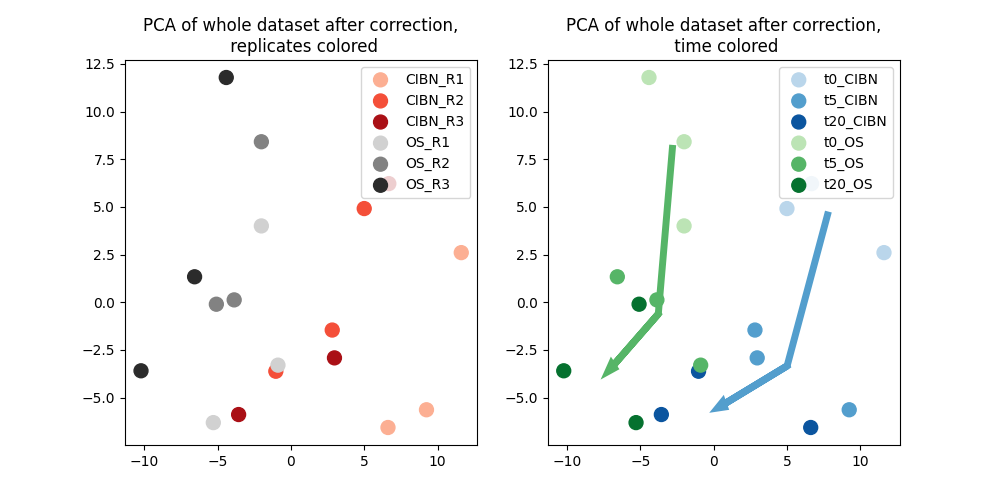

In [21]:
matplotlib.rcParams["figure.figsize"] = (10,5)
f = plt.figure()
ax1 = f.add_subplot(1,2,1)
ax2 = f.add_subplot(1,2,2)
ax1.set_title('PCA of whole dataset after correction,\n replicates colored')
ax2.set_title('PCA of whole dataset after correction,\n time colored')
labels = [N1+"_R1",N1+"_R2",N1+"_R3",N2+"_R1",N2+"_R2",N2+"_R3"]
for i in range(2):
    for j in range(3):
        TMP = X_WHOLE_PCA[[9*i + 3*k + j for k in range(3)]]
        c_TMP = c_WHOLE_REP[[9*i + 3*k + j for k in range(3)]]
        ax1.scatter([x[0] for x in TMP], [x[1] for x in TMP], c=c_TMP,label=labels[3*i+j])
ax1.legend()

time_means = []
for i in range(6):
        time_means.append(np.mean(X_WHOLE_PCA[3*i:3*(i+1)],axis=0)[:2])
time_means

labels = ["t0_"+N1,"t5_"+N1,"t20_"+N1,"t0_"+N2,"t5_"+N2,"t20_"+N2]
for i in range(6):
    ax2.scatter([x[0] for x in X_WHOLE_PCA[3*i:3*(i+1)]], [x[1] for x in X_WHOLE_PCA[3*i:3*(i+1)]], c=c_WHOLE_TIME[3*i:3*(i+1)], label=labels[i])

ax2.plot([t[0] for t in time_means[:3]],[t[1] for t in time_means[:3]], lw = 5, c = sns.color_palette("Blues")[3])
ax2.plot([t[0] for t in time_means[3:]],[t[1] for t in time_means[3:]], lw = 5, c = sns.color_palette("Greens")[3])
ax2.arrow(time_means[1][0],time_means[1][1],time_means[2][0] - time_means[1][0],time_means[2][1] - time_means[1][1], lw = 5,head_width=0.3,color = sns.color_palette("Blues")[3])
ax2.arrow(time_means[4][0],time_means[4][1],time_means[5][0] - time_means[4][0],time_means[5][1] - time_means[4][1], lw = 5,head_width=0.3,color = sns.color_palette("Greens")[3])
ax2.legend()

plt.show()